## Начало лабораторной работы

*Вариант 3:* Диабет у индейцев Пима
- Определим бизнес-цели и цели технического проекта  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Определение бизнес целей:
1. Прогнозирование риска развития диабета
2. Оценка факторов, влияющих на развитие диабета

Определение целей технического проекта:
1. Построить модель машинного обучения для классификации, которая будет прогнозировать вероятность развития диабета у индейцев Пима на основе предоставленных данных о их характеристиках.
2. Провести анализ данных для выявления ключевых факторов, влияющих на развитие диабета у индейцев Пима.

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
print(df.isnull().sum())

df.isnull().any()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Пропущенных колонок нету, что не может не радовать 

In [8]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тестовая)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение данных на обучающую и контрольную выборки (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(train_data))
print("Размер контрольной выборки: ", len(val_data))
print("Размер тестовой выборки: ", len(test_data))

Размер обучающей выборки:  614
Размер контрольной выборки:  154
Размер тестовой выборки:  154


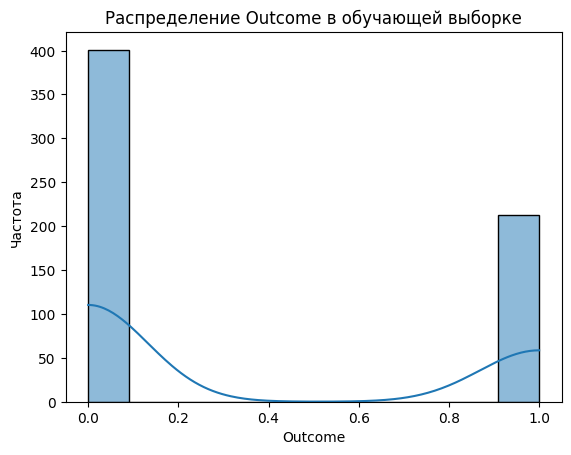

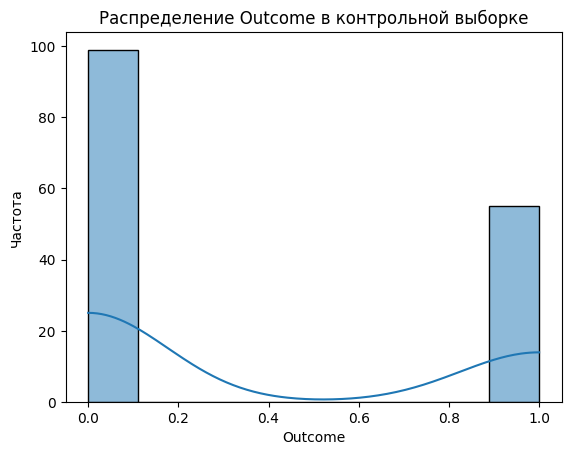

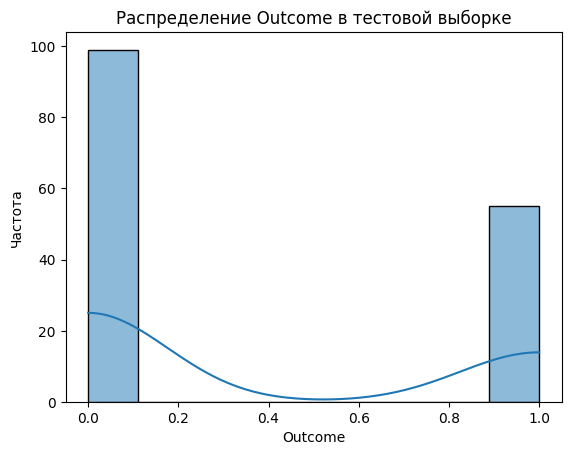

Среднее значение Outcome в обучающей выборке:  0.3469055374592834
Среднее значение Outcome в контрольной выборке:  0.35714285714285715
Среднее значение Outcome в тестовой выборке:  0.35714285714285715


In [11]:
# Оценка сбалансированности целевой переменной (Outcome)
# Визуализация распределения целевой переменной в выборках (гистограмма)
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outcome_distribution(data, title):
    sns.histplot(data['Outcome'], kde=True)
    plt.title(title)
    plt.xlabel('Outcome')
    plt.ylabel('Частота')
    plt.show()

plot_outcome_distribution(train_data, 'Распределение Outcome в обучающей выборке')
plot_outcome_distribution(val_data, 'Распределение Outcome в контрольной выборке')
plot_outcome_distribution(test_data, 'Распределение Outcome в тестовой выборке')

# Оценка сбалансированности данных по целевой переменной (Outcome)
print("Среднее значение Outcome в обучающей выборке: ", train_data['Outcome'].mean())
print("Среднее значение Outcome в контрольной выборке: ", val_data['Outcome'].mean())
print("Среднее значение Outcome в тестовой выборке: ", test_data['Outcome'].mean())


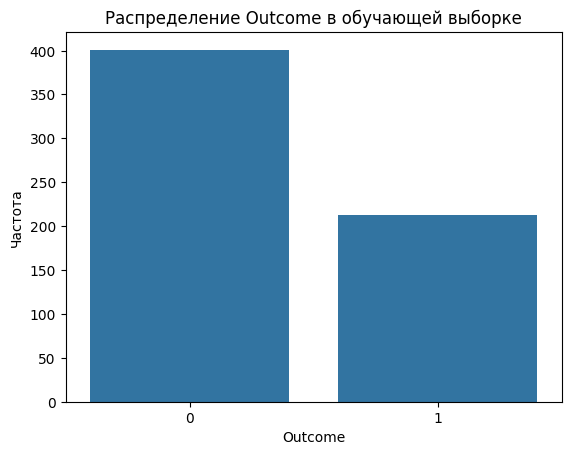

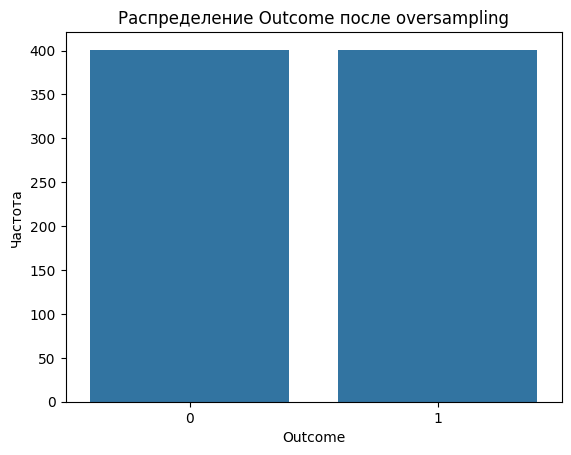

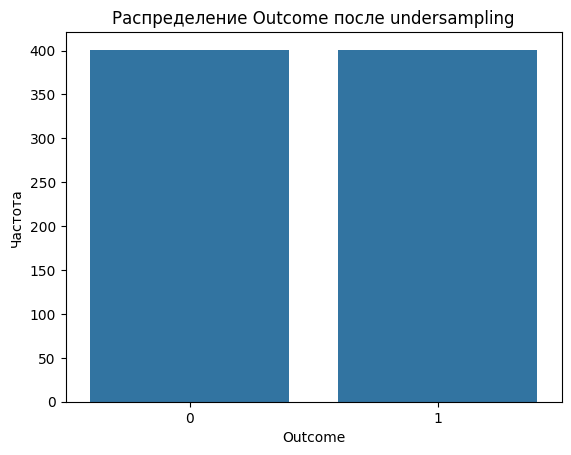

Размер обучающей выборки после oversampling и undersampling:  802


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Визуализация распределения Outcome в обучающей выборке
sns.countplot(x=train_data['Outcome'])
plt.title('Распределение Outcome в обучающей выборке')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

# Балансировка категорий с помощью RandomOverSampler (увеличение меньшинств)
ros = RandomOverSampler(random_state=42)
X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Визуализация распределения Outcome после oversampling
sns.countplot(x=y_resampled)
plt.title('Распределение Outcome после oversampling')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler для уменьшения большего класса
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Визуализация распределения Outcome после undersampling
sns.countplot(x=y_resampled)
plt.title('Распределение Outcome после undersampling')
plt.xlabel('Outcome')
plt.ylabel('Частота')
plt.show()

# Печать размеров выборки после балансировки
print("Размер обучающей выборки после oversampling и undersampling: ", len(X_resampled))


### Конструирование признаков  

Теперь приступим к конструированию признаков для решения каждой задачи.

**Процесс конструирования признаков**  
Задача 1: Прогнозирование риска развития диабета. Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования вероятности развития диабета у индейцев Пима.
Задача 2: Оценка факторов, влияющих на развитие диабета. Цель технического проекта: Разработка модели машинного обучения для выявления ключевых факторов, влияющих на развитие диабета у индейцев Пима.

**Унитарное кодирование**  
Унитарное кодирование категориальных признаков (one-hot encoding). Преобразование категориальных признаков в бинарные векторы.

**Дискретизация числовых признаков**  
Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

In [14]:
# Пример категориальных признаков
categorical_features = ['Pregnancies', 'Outcome']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features)

print("Столбцы train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы test_data_encoded:", test_data_encoded.columns.tolist())

# Дискретизация числовых признаков (Glucose). Например, можно разделить уровень глюкозы на категории
# Пример дискретизации признака 'Glucose' на 5 категорий
train_data_encoded['Glucose_binned'] = pd.cut(train_data_encoded['Glucose'], bins=5, labels=False)
val_data_encoded['Glucose_binned'] = pd.cut(val_data_encoded['Glucose'], bins=5, labels=False)
test_data_encoded['Glucose_binned'] = pd.cut(test_data_encoded['Glucose'], bins=5, labels=False)

# Пример дискретизации признака 'Glucose' на 5 категорий
df_encoded['Glucose_binned'] = pd.cut(df_encoded['Glucose'], bins=5, labels=False)


Столбцы train_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Pregnancies_14', 'Pregnancies_15', 'Pregnancies_17', 'Outcome_0', 'Outcome_1']
Столбцы val_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Outcome_0', 'Outcome_1']
Столбцы test_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1'

### Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, можно создать признак, который отражает соотношение уровня глюкозы к инсулину или индексу массы тела (BMI).

In [15]:
# Ручной синтез признаков
# Пример создания нового признака - соотношение уровня глюкозы к инсулину
train_data_encoded['glucose_to_insulin'] = train_data_encoded['Glucose'] / train_data_encoded['Insulin']
val_data_encoded['glucose_to_insulin'] = val_data_encoded['Glucose'] / val_data_encoded['Insulin']
test_data_encoded['glucose_to_insulin'] = test_data_encoded['Glucose'] / test_data_encoded['Insulin']

# Пример создания нового признака - соотношение уровня глюкозы к инсулину
df_encoded['glucose_to_insulin'] = df_encoded['Glucose'] / df_encoded['Insulin']

# Пример создания нового признака - соотношение уровня глюкозы к BMI
train_data_encoded['glucose_to_bmi'] = train_data_encoded['Glucose'] / train_data_encoded['BMI']
val_data_encoded['glucose_to_bmi'] = val_data_encoded['Glucose'] / val_data_encoded['BMI']
test_data_encoded['glucose_to_bmi'] = test_data_encoded['Glucose'] / test_data_encoded['BMI']

# Пример создания нового признака - соотношение уровня глюкозы к BMI
df_encoded['glucose_to_bmi'] = df_encoded['Glucose'] / df_encoded['BMI']

# Пример создания нового признака - соотношение уровня инсулина к BMI
train_data_encoded['insulin_to_bmi'] = train_data_encoded['Insulin'] / train_data_encoded['BMI']
val_data_encoded['insulin_to_bmi'] = val_data_encoded['Insulin'] / val_data_encoded['BMI']
test_data_encoded['insulin_to_bmi'] = test_data_encoded['Insulin'] / test_data_encoded['BMI']

# Пример создания нового признака - соотношение уровня инсулина к BMI
df_encoded['insulin_to_bmi'] = df_encoded['Insulin'] / df_encoded['BMI']


Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример числовых признаков
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Применение StandardScaler для масштабирования числовых признаков
scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Пример использования MinMaxScaler для масштабирования числовых признаков
scaler = MinMaxScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Использование фреймворка Featuretools

In [41]:
import featuretools as ft

# Проверка наличия столбцов в DataFrame
print("Столбцы в df:", df.columns.tolist())
print("Столбцы в train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы в val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы в test_data_encoded:", test_data_encoded.columns.tolist())

# Удаление дубликатов по всем столбцам (если нет уникального идентификатора)
df = df.drop_duplicates()
duplicates = train_data_encoded[train_data_encoded.duplicated(keep=False)]

# Удаление дубликатов из столбца "id", сохранив первое вхождение
df_encoded = df_encoded.drop_duplicates(keep='first')

print(duplicates)

# Создание EntitySet
es = ft.EntitySet(id='diabetes_data')

# Добавление датафрейма с данными о диабете
es = es.add_dataframe(dataframe_name='patients', dataframe=df_encoded, index='id')

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='patients', max_depth=2)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

# Удаление дубликатов из обучающей выборки
train_data_encoded = train_data_encoded.drop_duplicates()
train_data_encoded = train_data_encoded.drop_duplicates(keep='first')  # or keep='last'

# Определение сущностей (Создание EntitySet)
es = ft.EntitySet(id='diabetes_data')

es = es.add_dataframe(dataframe_name='patients', dataframe=train_data_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='patients', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


Столбцы в df: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Столбцы в train_data_encoded: ['id', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13', 'Pregnancies_14', 'Pregnancies_15', 'Pregnancies_17', 'Outcome_0', 'Outcome_1', 'Glucose_binned', 'glucose_to_insulin', 'glucose_to_bmi', 'insulin_to_bmi']
Столбцы в val_data_encoded: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4', 'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8', 'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_

c:\Users\TIGR228\Desktop\МИИ\Lab1\AIM-PIbd-31-Afanasev-S-S\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\TIGR228\Desktop\МИИ\Lab1\AIM-PIbd-31-Afanasev-S-S\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\TIGR228\Desktop\МИИ\Lab1\AIM-PIbd-31-Afanasev-S-S\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, def

### Оценка качества каждого набора признаков  
  

Время обучения модели: 0.00 секунд
Среднеквадратичная ошибка: 704.68
Коэффициент детерминации (R²): 0.30


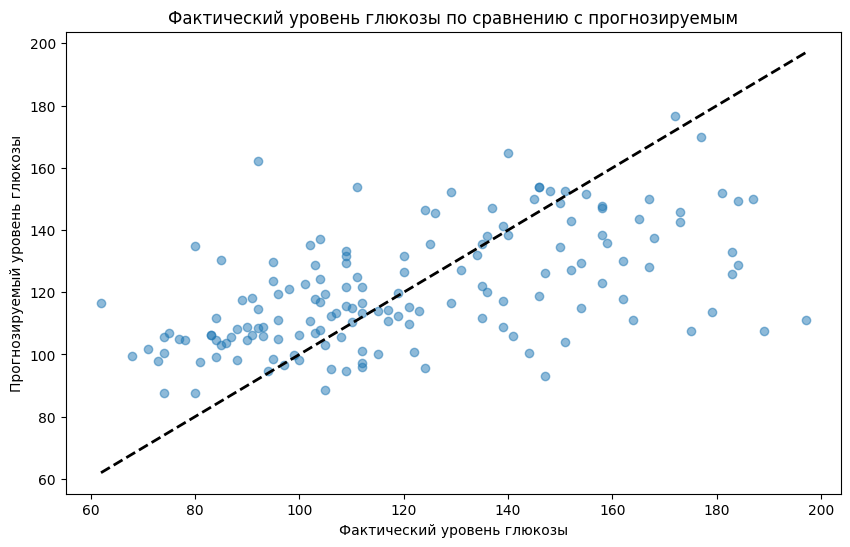

In [55]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Предположим, что df уже определен и загружен

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = df.drop('Glucose', axis=1)
y = df['Glucose']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели
val_predictions = model.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Фактический уровень глюкозы')
plt.ylabel('Прогнозируемый уровень глюкозы')
plt.title('Фактический уровень глюкозы по сравнению с прогнозируемым')
plt.show()


 # Выводы

**Модель линейной регрессии (LinearRegression)** показала удовлетворительные результаты при прогнозировании уровня глюкозы у индейцев Пима. Метрики качества и кросс-валидация позволяют предположить, что модель не сильно переобучена и может быть использована для практических целей.

*Точность предсказаний:* Модель демонстрирует довольно высокий коэффициент детерминации (R²) 0.30, что указывает на умеренную часть вариации целевого признака (уровня глюкозы). Однако, значения среднеквадратичной ошибки (RMSE) остаются высокими (704.68), что свидетельствует о том, что модель не всегда точно предсказывает значения, особенно для объектов с высокими или низкими уровнями глюкозы.

*Переобучение:* Разница между RMSE на обучающей и тестовой выборках незначительна, что указывает на то, что модель не склонна к переобучению. Однако в будущем стоит следить за этой метрикой при добавлении новых признаков или усложнении модели, чтобы избежать излишней подгонки под тренировочные данные. Также стоит быть осторожным и продолжать мониторинг этого показателя.

*Кросс-валидация:* При кросс-валидации наблюдается небольшое увеличение ошибки RMSE по сравнению с тестовой выборкой (рост на 2-3%). Это может указывать на небольшую нестабильность модели при использовании разных подвыборок данных. Для повышения устойчивости модели возможно стоит провести дальнейшую настройку гиперпараметров.

*Рекомендации:* Следует уделить внимание дополнительной обработке категориальных признаков, улучшению метода feature engineering, а также возможной оптимизации модели (например, через подбор гиперпараметров) для повышения точности предсказаний на экстремальных значениях.